## Observations and Insights 

In [98]:
#%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "./Resources/Mouse_metadata.csv"
study_results_path = "./Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_complete = pd.merge(mouse_metadata,study_results, how="outer", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [99]:
# Checking the number of mice.
unique_mouse = mouse_data_complete["Mouse ID"].value_counts() 
unique_mouse.count()

249

In [100]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_data_complete[mouse_data_complete.duplicated(["Mouse ID", "Timepoint"])]["Mouse ID"]
duplicates.unique()

array(['g989'], dtype=object)

In [101]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_list = mouse_data_complete[mouse_data_complete.duplicated(["Mouse ID", "Timepoint"])]
duplicates_list

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [102]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
updated_mouse_data = mouse_data_complete[mouse_data_complete["Mouse ID"] != "g989"]

In [103]:
# Checking the number of mice in the clean DataFrame.
unique_mouse2 = updated_mouse_data["Mouse ID"].value_counts()
unique_mouse2.count()

248

## Summary Statistics

In [139]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_mean = updated_mouse_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
regimen_median = updated_mouse_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
regimen_var = updated_mouse_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
regimen_stdev = updated_mouse_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
regimen_sem =updated_mouse_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_stats_df = pd.DataFrame()
summary_stats_df["Average Volume"] = regimen_mean 
summary_stats_df["Median Volume"] = regimen_median
summary_stats_df["Variance"] = regimen_var
summary_stats_df["StDev"] = regimen_stdev
summary_stats_df["SEM"] = regimen_sem

summary_stats_df

,Average Volume,Median Volume,Variance,StDev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [109]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_df2 = updated_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
summary_stats_df2.head()

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

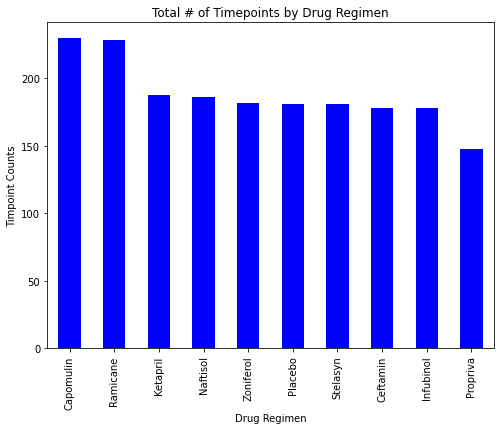

In [234]:
timepoint_counts = updated_mouse_data.groupby(["Drug Regimen"]).count()
timepoint_counts["Timepoint"].sort_values(ascending=False).plot(kind="bar", facecolor="blue", figsize=(8,6),
                                title="Total # of Timepoints by Drug Regimen",
                                xlabel="Drug Regimen",
                                ylabel="Timpoint Counts")

plt.show()

In [350]:
x_axis = np.arange(len(timepoint_df))
x_axis
tick_locations = [value for value in x_axis]
names = updated_mouse_data["Drug Regimen"].unique()
names = names.sort()


([<matplotlib.axis.XTick at 0x25e03d8cf08>,
 <a list of 10 Text major ticklabel objects>)

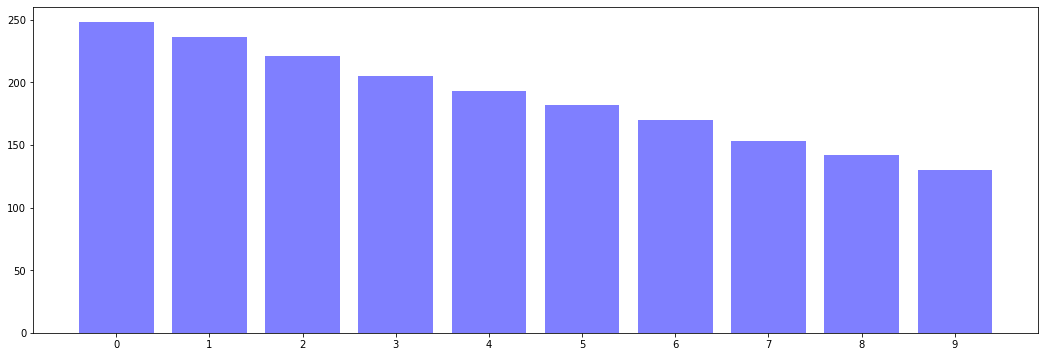

In [351]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoint_df = updated_mouse_data["Timepoint"].value_counts()
#timepoint_counts = timepoint_df["Drug Regimen"].count()
#x_axis = pd.Series(updated_mouse_data["Drug Regimen"].unique()).sort_values
#x_axis = updated_mouse_data["Drug Regimen"].unique()
plt.figure(figsize=(18,6))
plt.bar(x_axis, timepoint_df, color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, names)

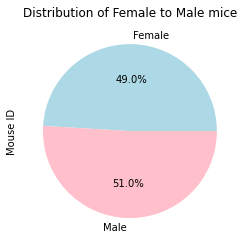

In [188]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
updated_mouse_data.groupby(["Sex"]).count().plot(kind= "pie", y="Mouse ID", legend=False, autopct='%1.1f%%', colors = ["lightblue", "pink"],
                                                     title ="Distribution of Female to Male mice" )


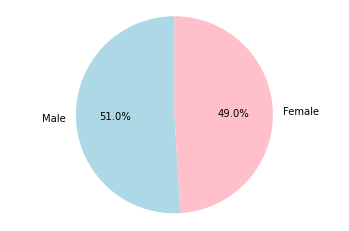

In [120]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_mice = updated_mouse_data[(updated_mouse_data["Sex"] == "Male")].count()["Mouse ID"]
female_mice = updated_mouse_data[(updated_mouse_data["Sex"] == "Female")].count()["Mouse ID"]
counts = [male_mice, female_mice]
type = ["Male", "Female"]
colors = ["lightblue","pink"]
plt.title = ("Distribution of Female to Male mice")
plt.pie(counts, labels=type, colors=colors,autopct="%1.1f%%", startangle=90)
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [333]:
updated_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [341]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = updated_mouse_data["Timepoint"].max()
greatest_tummor_volume = updated_mouse_data.groupby(["Drug Regimen","Timepoint"]).max()["Tumor Volume (mm3)"]
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
greatest_tummor_volume

Drug Regimen  Timepoint
Capomulin     0            45.000000
              5            45.895647
              10           46.759074
              15           47.488599
              20           48.158209
                             ...    
Zoniferol     25           60.253481
              30           65.893986
              35           66.742924
              40           71.108118
              45           73.324432
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
